In [1]:
# TEMEL
import numpy as np
import pandas as pd

# GÖRSELLEŞTİRME
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# UYARILARI KAPAT
import warnings
warnings.filterwarnings("ignore")

# MAKİNE ÖĞRENMESİ - TEMEL
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

# MODELLER
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# DEĞERLENDİRME METRİKLERİ
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    roc_auc_score,
    RocCurveDisplay
)



In [2]:
df = pd.read_csv('/Users/tugcekizilkoca/Desktop/veri-madenciligi/datasets/heart.csv')


In [3]:
# Returns number of rows and columns of the dataset
df.shape

(303, 14)

In [ ]:
# 3) Eksik değer kontrolü
print("\nEksik değer sayıları:")
print(df.isnull().sum())

In [4]:
# Returns an object with all of the column headers
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
# Returns the first x number of rows when head(x). Without a number it returns 5
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# Returns the last x number of rows when tail(x). Without a number it returns 5
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
# Returns true for a column having null values, else false
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [9]:
# Returns basic statistics on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


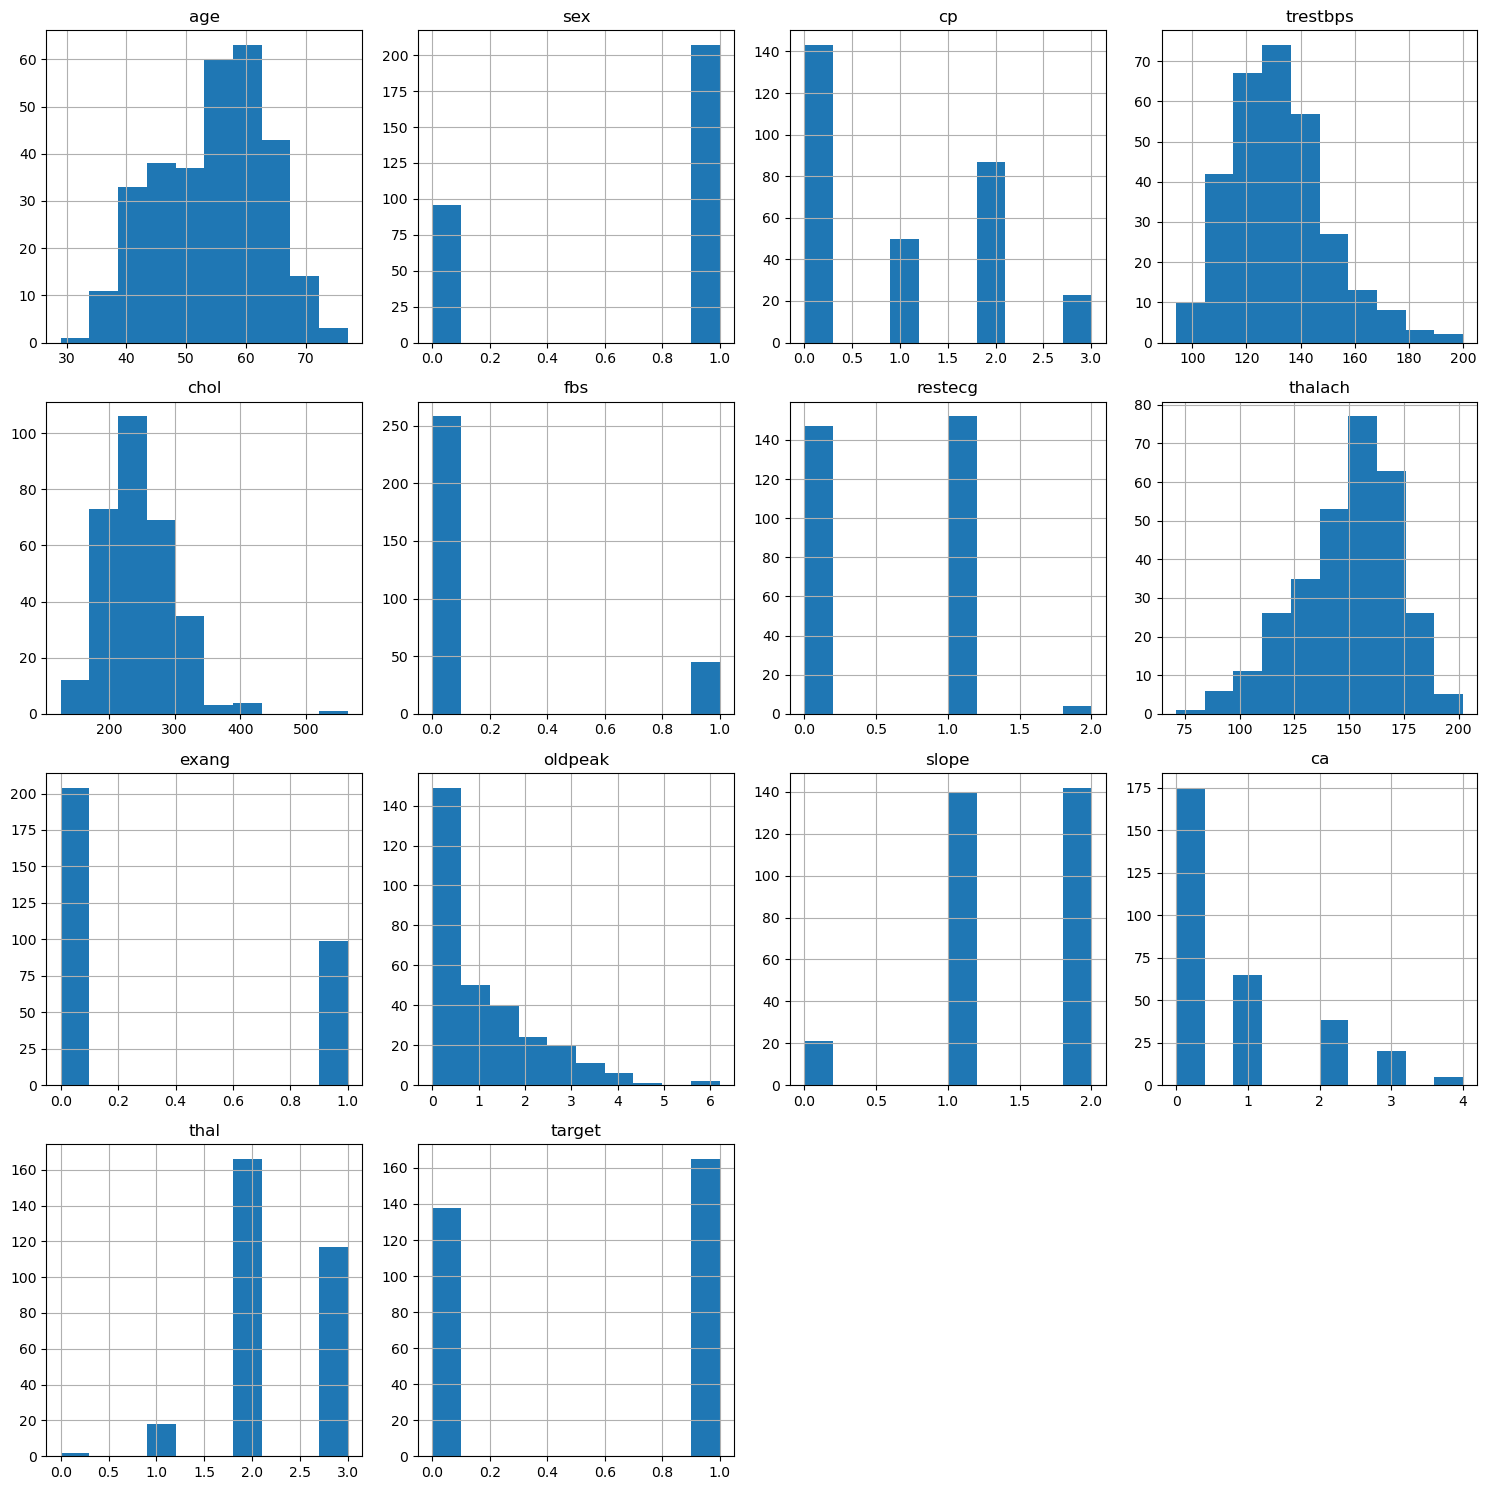

In [10]:
df.hist(figsize=(15,15))
plt.tight_layout()
plt.show()


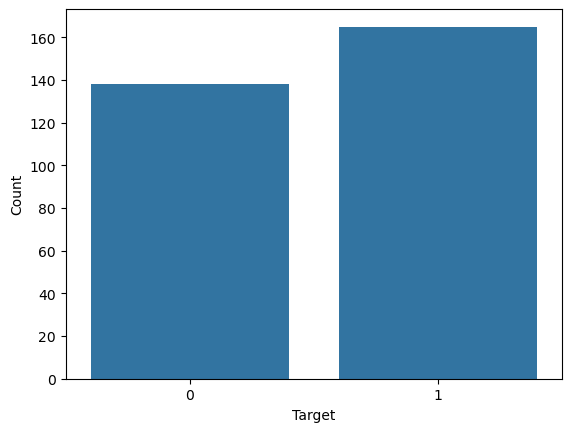

In [11]:
sns.countplot(x='target', data=df)
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()



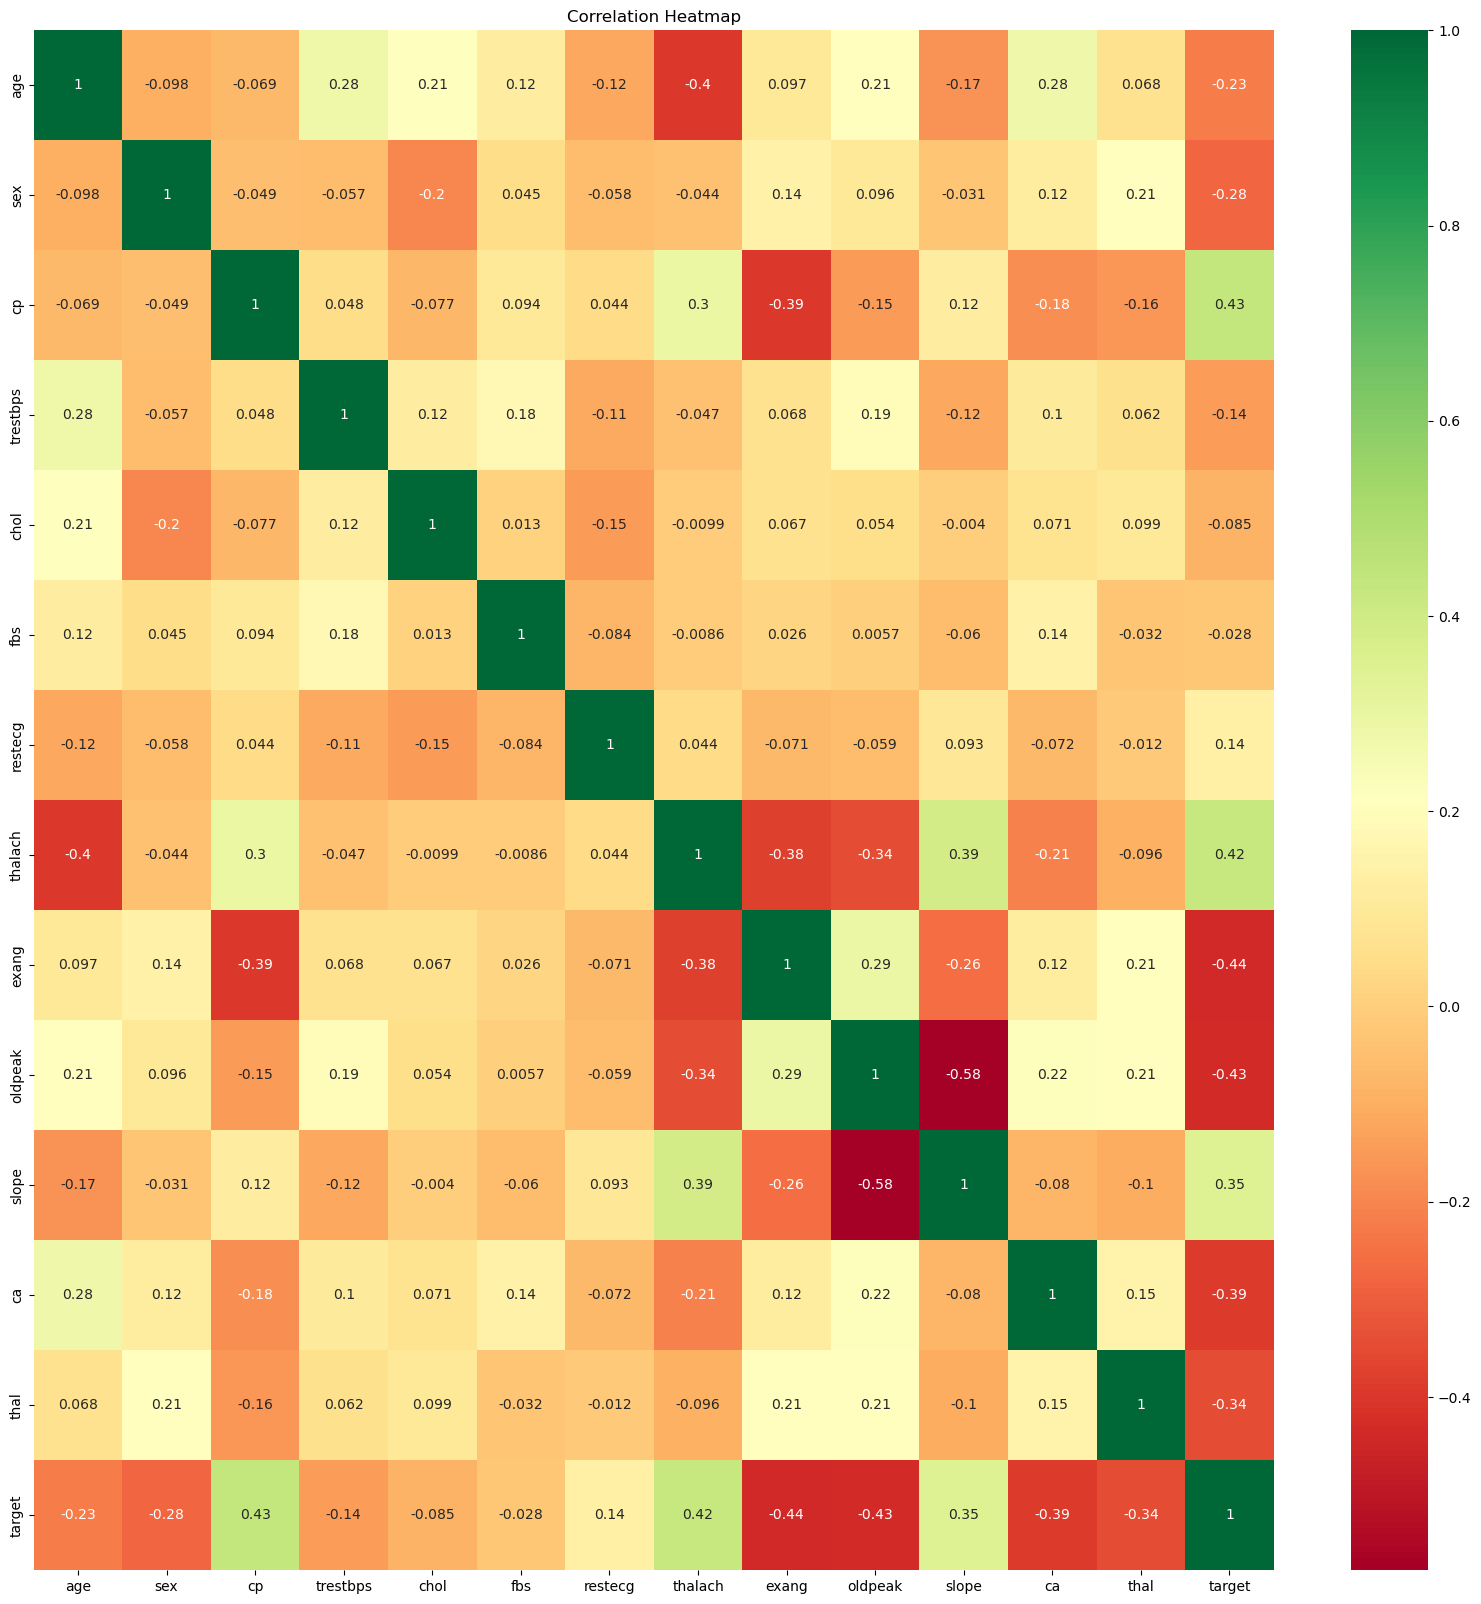

In [12]:
# Selecting correlated features using Heatmap

# Get correlation of all the features of the dataset
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')
plt.title("Correlation Heatmap")
plt.show()



In [13]:
dataset = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [14]:
dataset.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [15]:
from sklearn.preprocessing import StandardScaler
standScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standScaler.fit_transform(dataset[columns_to_scale])

In [16]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


In [17]:
# Splitting the dataset into dependent and independent features
X = dataset.drop('target', axis=1)
y = dataset['target']

In [18]:
#KNN

In [19]:
# Importing essential libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [20]:
# Finding the best accuracy for knn algorithm using cross_val_score 
knn_scores = []
for i in range(1, 21):
  knn_classifier = KNeighborsClassifier(n_neighbors=i)
  cvs_scores = cross_val_score(knn_classifier, X, y, cv=10)
  knn_scores.append(round(cvs_scores.mean(),3))

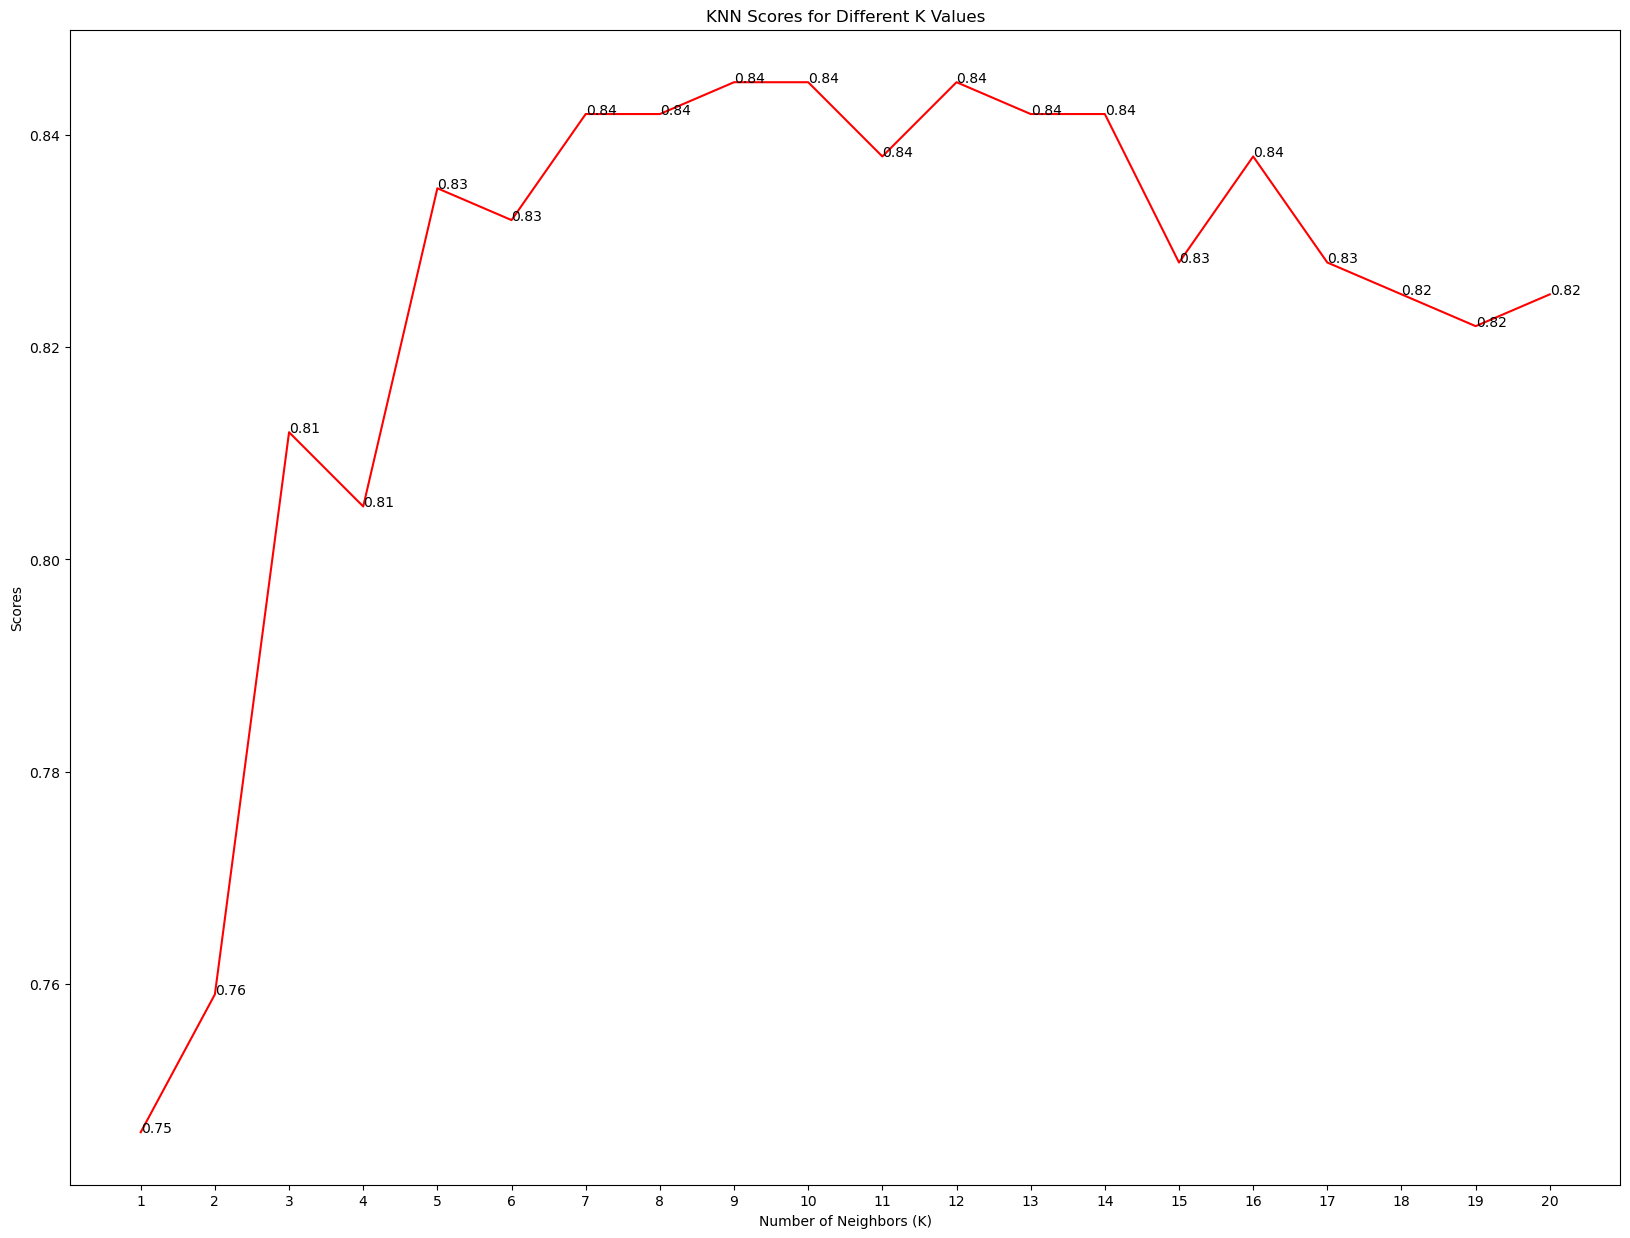

In [21]:
plt.figure(figsize=(20,15))

# skor grafiği
plt.plot(range(1,21), knn_scores, color='red')

# her noktanın üzerine skor yaz
for i, score in enumerate(knn_scores, start=1):
    plt.text(i, score, f"{score:.2f}")

# eksen ayarları
plt.xticks(range(1,21))
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('KNN Scores for Different K Values')

plt.show()


In [22]:
# Training the knn classifier model with k value as 12
knn_classifier = KNeighborsClassifier(n_neighbors=12)
cvs_scores = cross_val_score(knn_classifier, X, y, cv=10)
print("KNeighbours Classifier Accuracy with K=12 is: {}%".format(round(cvs_scores.mean(), 4)*100))

KNeighbours Classifier Accuracy with K=12 is: 84.48%


In [23]:
# Importing essential libraries
from sklearn.tree import DecisionTreeClassifier

In [24]:
# Finding the best accuracy for decision tree algorithm using cross_val_score 
decision_scores = []
for i in range(1, 11):
  decision_classifier = DecisionTreeClassifier(max_depth=i)
  cvs_scores = cross_val_score(decision_classifier, X, y, cv=10)
  decision_scores.append(round(cvs_scores.mean(),3))

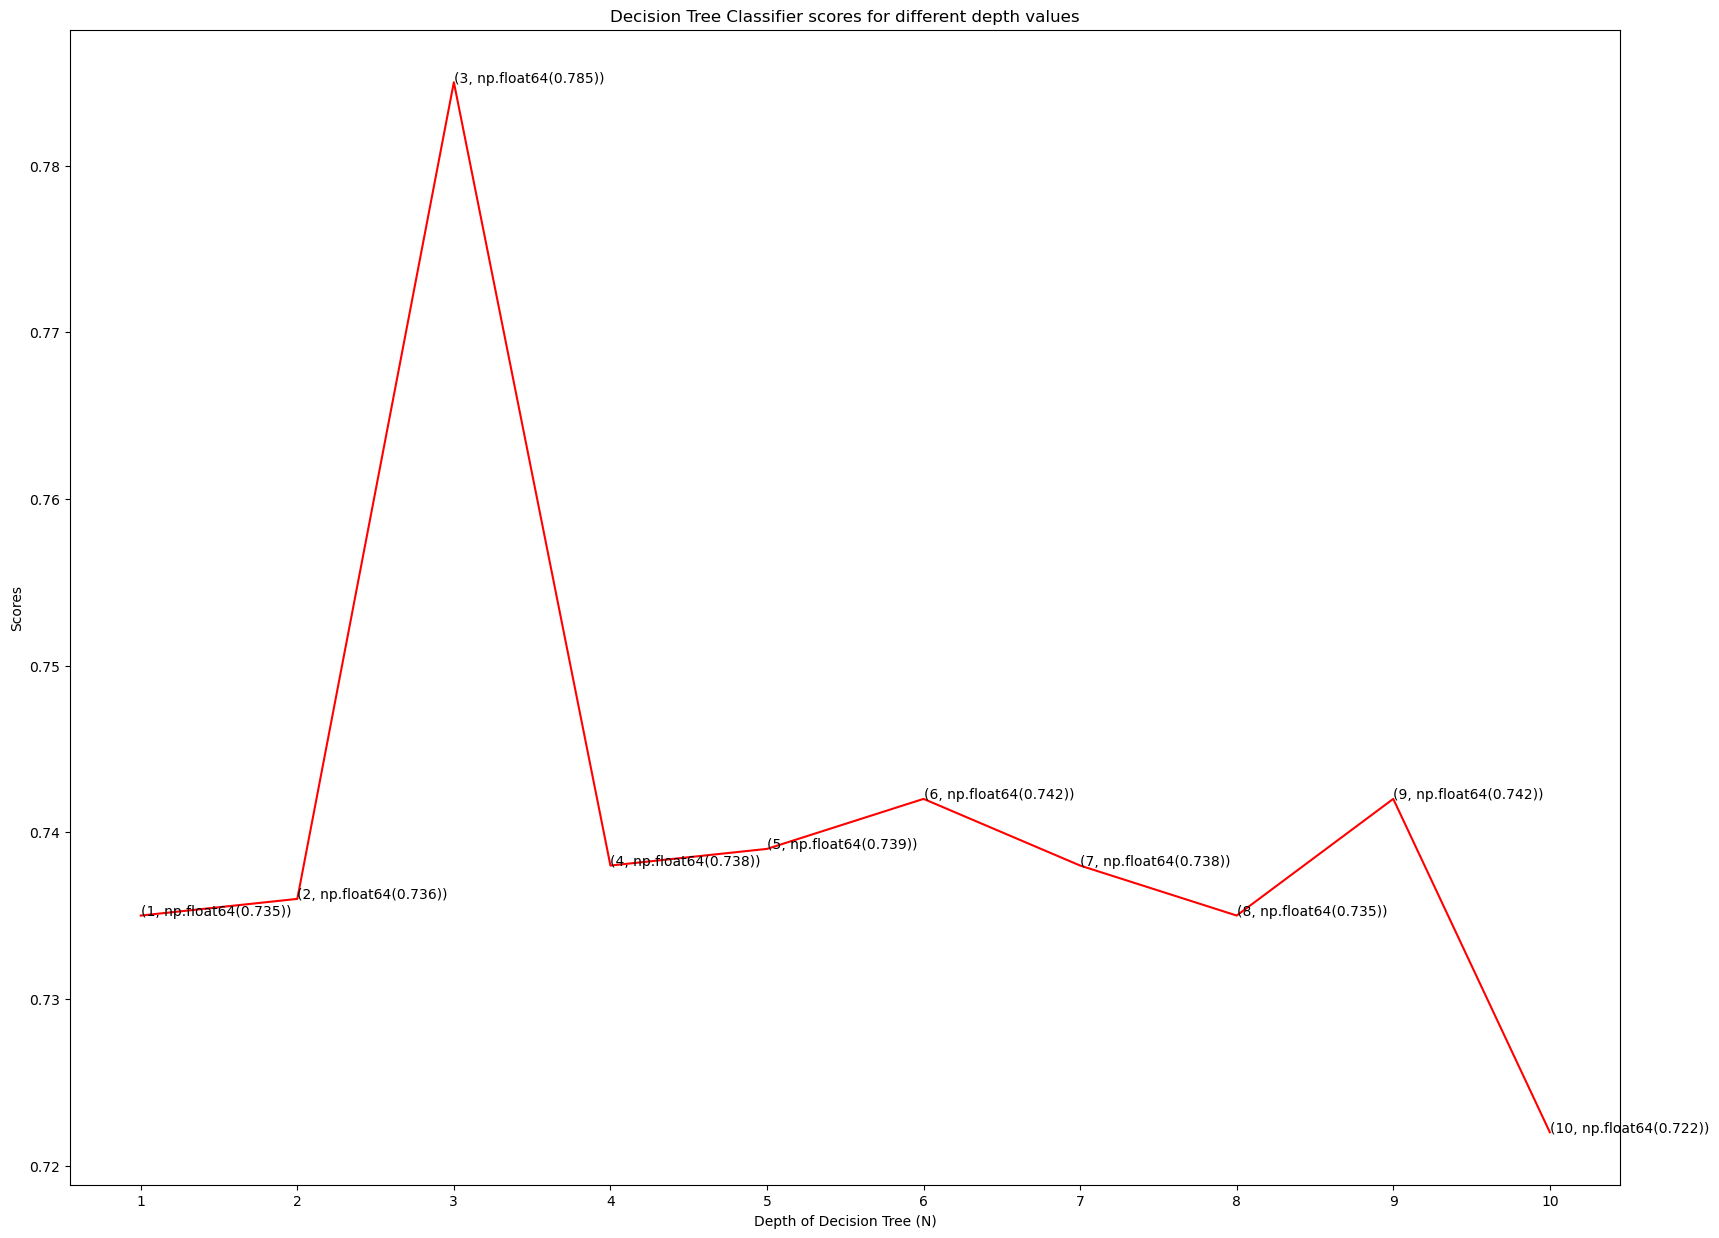

In [25]:
# Plotting the results of decision_scores
plt.figure(figsize=(20,15))
plt.plot([i for i in range(1, 11)], decision_scores, color = 'red')
for i in range(1,11):
    plt.text(i, decision_scores[i-1], (i, decision_scores[i-1]))
plt.xticks([i for i in range(1, 11)])
plt.xlabel('Depth of Decision Tree (N)')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different depth values')
plt.show()

In [26]:
# Training the decision tree classifier model with max_depth value as 3
decision_classifier = DecisionTreeClassifier(max_depth=3)
cvs_scores = cross_val_score(decision_classifier, X, y, cv=10)
print("Decision Tree Classifier Accuracy with max_depth=3 is: {}%".format(round(cvs_scores.mean(), 4)*100))

Decision Tree Classifier Accuracy with max_depth=3 is: 78.51%


In [27]:
# Importing essential libraries
from sklearn.ensemble import RandomForestClassifier

In [28]:
# Finding the best accuracy for random forest algorithm using cross_val_score 
forest_scores = []
for i in range(10, 101, 10):
  forest_classifier = RandomForestClassifier(n_estimators=i)
  cvs_scores = cross_val_score(forest_classifier, X, y, cv=5)
  forest_scores.append(round(cvs_scores.mean(),3))

In [29]:
# Plotting the results of forest_scores
plt.figure(figsize=(20,15))
plt.plot([n for n in range(10, 101, 10)], forest_scores, color = 'red')
for i in range(1,11):
    plt.text(i*10, forest_scores[i-1], (i*10, forest_scores[i-1]))
plt.xticks([i for i in range(10, 101, 10)])
plt.xlabel('Number of Estimators (N)')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different N values')

Text(0.5, 1.0, 'Random Forest Classifier scores for different N values')

In [30]:
# Training the random forest classifier model with n value as 90
forest_classifier = RandomForestClassifier(n_estimators=90)
cvs_scores = cross_val_score(forest_classifier, X, y, cv=5)
print("Random Forest Classifier Accuracy with n_estimators=90 is: {}%".format(round(cvs_scores.mean(), 4)*100))

Random Forest Classifier Accuracy with n_estimators=90 is: 81.16%


In [31]:
# Hedef değişken ismini burada ayarla:
TARGET_COL = 'target'   # kalp hastalığı datası için
# TARGET_COL = 'Completed'   # kurs tamamlama datası için

# X, y ayrımı
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

# Train–test ayırma
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((242, 13), (61, 13))

In [32]:
# One-hot + scale edilmiş dataset üzerinden X, y oluştur
X = dataset.drop('target', axis=1)
y = dataset['target']

# Train–test ayırma
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((242, 30), (61, 30))

In [33]:
from sklearn.ensemble import RandomForestClassifier

best_rf = RandomForestClassifier(
    n_estimators=90,    
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1
)

best_rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=90, random_state=42)

Test Accuracy: 0.8197

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



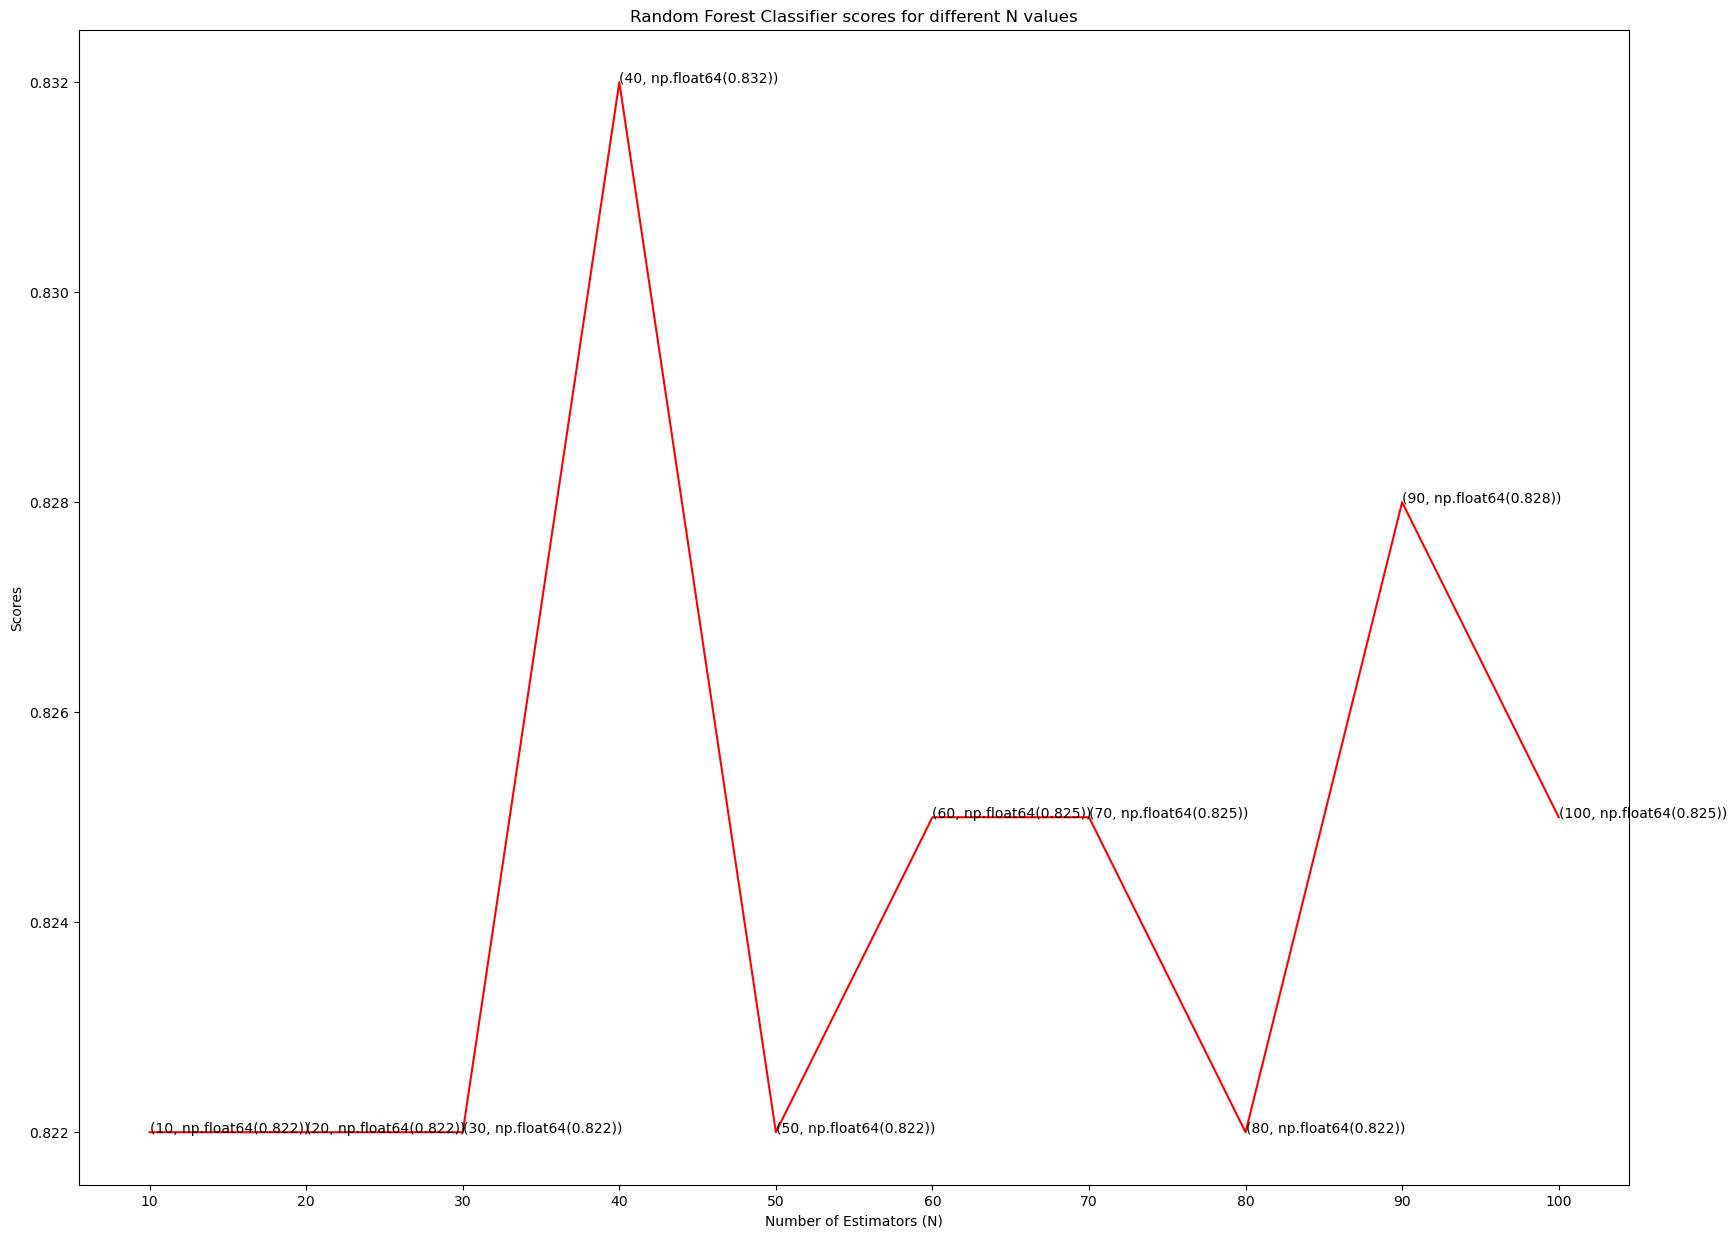

<Figure size 500x400 with 0 Axes>

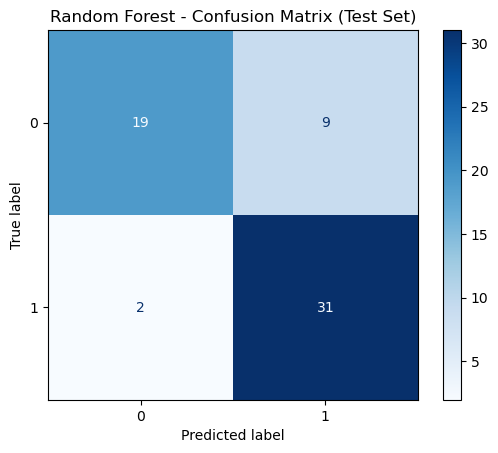

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Test tahminleri
y_pred = best_rf.predict(X_test)

print("Test Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")
plt.title("Random Forest - Confusion Matrix (Test Set)")
plt.show()


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=7,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

rf.fit(X_train, y_train)

y_train_rf = rf.predict(X_train)
y_test_rf  = rf.predict(X_test)

print("Random Forest — Train Accuracy:", accuracy_score(y_train, y_train_rf))
print("Random Forest — Test Accuracy :", accuracy_score(y_test, y_test_rf))


Random Forest — Train Accuracy: 0.8842975206611571
Random Forest — Test Accuracy : 0.819672131147541


In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Pipeline: önce scale, sonra KNN
knn_model = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(
        n_neighbors=7,       # genellikle en dengeli K
        weights='distance',  # uzaklığa göre ağırlık → daha stabil
        p=2                  # Euclidean distance
    ))
])

# Train
knn_model.fit(X_train, y_train)

# Tahminler
y_train_knn = knn_model.predict(X_train)
y_test_knn  = knn_model.predict(X_test)

print("KNN — Train Accuracy:", accuracy_score(y_train, y_train_knn))
print("KNN — Test Accuracy :", accuracy_score(y_test, y_test_knn))

# Overfitting yorumu
diff = accuracy_score(y_train, y_train_knn) - accuracy_score(y_test, y_test_knn)
if diff < 0.03:
    print("\n👉 Overfitting yok, model dengeli.")
elif diff < 0.08:
    print("\n⚠ Hafif overfitting var ama kabul edilebilir.")
else:
    print("\n❌ Belirgin overfitting var, K değerini artırmalıyız.")


KNN — Train Accuracy: 1.0
KNN — Test Accuracy : 0.8032786885245902

❌ Belirgin overfitting var, K değerini artırmalıyız.


In [37]:
gb = GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=150,
    max_depth=2,
    random_state=42
)

gb.fit(X_train, y_train)

y_train_pred = gb.predict(X_train)
y_test_pred  = gb.predict(X_test)

print("Train:", accuracy_score(y_train, y_train_pred))
print("Test:", accuracy_score(y_test, y_test_pred))

Train: 0.9297520661157025
Test: 0.8360655737704918


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

results = {}

# Logistic Regression
log_model = Pipeline([
    ("scaler", StandardScaler()),
    ("log", LogisticRegression(max_iter=500))
])
log_model.fit(X_train, y_train)
results["Logistic Regression"] = accuracy_score(y_test, log_model.predict(X_test))

# Random Forest
rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=7,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features='sqrt',
    random_state=42
)
rf_model.fit(X_train, y_train)
results["Random Forest"] = accuracy_score(y_test, rf_model.predict(X_test))

# Gradient Boosting
gb_model = GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=150,
    max_depth=2,
    random_state=42
)
gb_model.fit(X_train, y_train)
results["Gradient Boosting"] = accuracy_score(y_test, gb_model.predict(X_test))

# KNN
knn_model = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=7, weights='distance'))
])
knn_model.fit(X_train, y_train)
results["KNN"] = accuracy_score(y_test, knn_model.predict(X_test))

results


{'Logistic Regression': 0.8360655737704918,
 'Random Forest': 0.819672131147541,
 'Gradient Boosting': 0.8360655737704918,
 'KNN': 0.8032786885245902}

In [39]:
final_model = GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=150,
    max_depth=2,
    random_state=42
)

final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)


In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.81      0.91      0.86        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61



<Figure size 500x400 with 0 Axes>

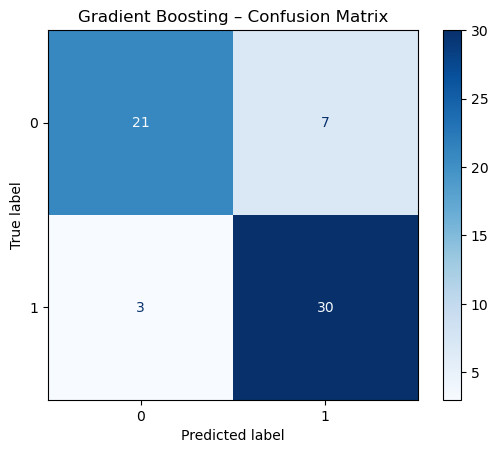

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap="Blues", values_format="d")
plt.title("Gradient Boosting – Confusion Matrix")
plt.show()


ROC AUC: 0.9015


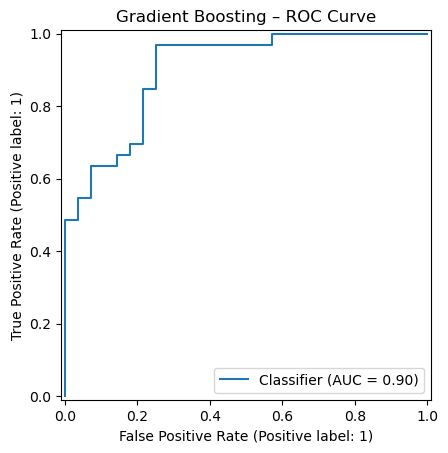

In [42]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

y_proba = final_model.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", round(auc, 4))

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("Gradient Boosting – ROC Curve")
plt.show()


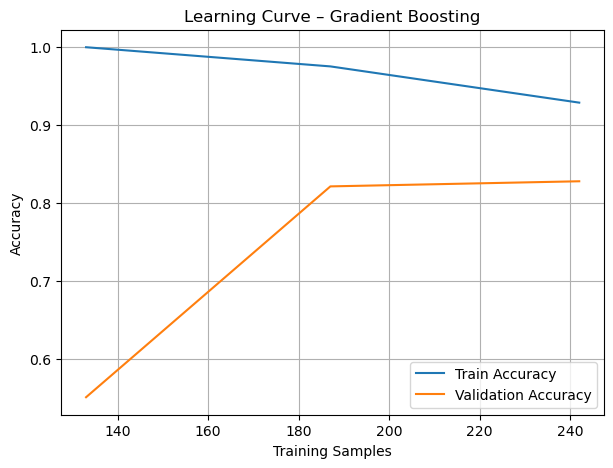

In [43]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    final_model,
    X, y,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring='accuracy',
    n_jobs=-1
)

plt.figure(figsize=(7,5))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train Accuracy')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Accuracy')
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.title("Learning Curve – Gradient Boosting")
plt.legend()
plt.grid(True)
plt.show()


In [44]:
import pandas as pd

model_results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "KNN", "Gradient Boosting"],
    "Accuracy": [0.8032786885245902, 0.819672131147541, 0.819672131147541, 0.8360655737704918]
})

model_results_df


,Model,Accuracy
0,Logistic Regression,0.803279
1,Random Forest,0.819672
2,KNN,0.819672
3,Gradient Boosting,0.836066


In [45]:
def tahmin_arayuzu_scaler(final_model, feature_names, standScaler):
    print("\n📌 Kalp Hastalığı Tahmin Arayüzü ")
    print("------------------------------------------------------")

    # SAYISAL GİRDİLER
    age = float(input("Yaş: "))
    trestbps = float(input("İstirahat Kan Basıncı (trestbps): "))
    chol = float(input("Kolesterol (chol): "))
    thalach = float(input("Maks Nabız (thalach): "))
    oldpeak = float(input("ST Depresyonu (oldpeak): "))

    # KATEGORİK GİRDİLER
    sex = int(input("sex (0=Kadın, 1=Erkek): "))
    cp = int(input("cp (0–3): "))
    fbs = int(input("fbs (0–1): "))
    restecg = int(input("restecg (0–2): "))
    exang = int(input("exang (0–1): "))
    slope = int(input("slope (0–2): "))
    ca = int(input("ca (0–4): "))
    thal = int(input("thal (0–3): "))

    # MODELİN BEKLEDİĞİ BOŞ VERİ
    yeni_veri = pd.DataFrame([[0]*len(feature_names)], columns=feature_names)

    # SCALER’LI numeric kolonlar
    numeric = pd.DataFrame([[age, trestbps, chol, thalach, oldpeak]],
                            columns=["age", "trestbps", "chol", "thalach", "oldpeak"])
    numeric_scaled = standScaler.transform(numeric)

    yeni_veri.loc[0, ["age","trestbps","chol","thalach","oldpeak"]] = numeric_scaled[0]

    # ONE HOT → sex
    for i in range(2):
        yeni_veri[f"sex_{i}"] = 1 if sex == i else 0

    # ONE HOT → cp
    for i in range(4):
        yeni_veri[f"cp_{i}"] = 1 if cp == i else 0

    # ONE HOT → fbs
    for i in range(2):
        yeni_veri[f"fbs_{i}"] = 1 if fbs == i else 0

    # ONE HOT → restecg
    for i in range(3):
        yeni_veri[f"restecg_{i}"] = 1 if restecg == i else 0

    # ONE HOT → exang
    for i in range(2):
        yeni_veri[f"exang_{i}"] = 1 if exang == i else 0

    # ONE HOT → slope
    for i in range(3):
        yeni_veri[f"slope_{i}"] = 1 if slope == i else 0

    # ONE HOT → ca
    for i in range(5):
        yeni_veri[f"ca_{i}"] = 1 if ca == i else 0

    # ONE HOT → thal
    for i in range(4):
        yeni_veri[f"thal_{i}"] = 1 if thal == i else 0

    print("\n--- MODELE GÖNDERİLEN (SCALER + ONE-HOT) VERİ ---")
    print(yeni_veri)

    tahmin = final_model.predict(yeni_veri)[0]
    olasilik = final_model.predict_proba(yeni_veri)[0][1]

    print("\n🔍 Tahmin Sonucu:")
    print("➡ **RİSK VAR**" if tahmin == 1 else "➡ **RİSK YOK**")
    print(f"➡ Olasılık: %{round(olasilik*100,2)}")

    return yeni_veri


In [46]:
def klinik_rapor_uret(final_model, standScaler, user_input_df):
    tahmin = final_model.predict(user_input_df)[0]
    olasilik = final_model.predict_proba(user_input_df)[0][1]
    yuzde = round(olasilik * 100, 2)

    if yuzde < 30:
        risk_seviyesi = "Düşük Risk"
    elif yuzde < 60:
        risk_seviyesi = "Orta Risk"
    else:
        risk_seviyesi = "Yüksek Risk"

    importances = final_model.feature_importances_
    feature_names = final_model.feature_names_in_

    fi = pd.DataFrame({
        "Özellik": feature_names,
        "Önem": importances
    }).sort_values("Önem", ascending=False).head(5)

    print("\n=======================================")
    print("     🫀 Klinik Değerlendirme Raporu")
    print("=======================================\n")

    print(f"🔎 Tahmini Risk Yüzdesi: %{yuzde}")
    print(f"📊 Risk Seviyesi: {risk_seviyesi}\n")

    print("📌 Modelin En Önemli 5 Risk Faktörü:")
    print(fi.to_string(index=False), "\n")

    print("🩺 Klinik Değerlendirme:")
    if yuzde < 30:
        print("- Bulgular düşük risk ile uyumlu.")
    elif yuzde < 60:
        print("- Hastada orta düzeyde risk faktörleri var.")
    else:
        print("- Hastada yüksek risk tespit edilmiştir.")
        print("- Kardiyoloji uzmanı değerlendirmesi önerilir.")

    print("\n=======================================\n")


In [ ]:
veri = tahmin_arayuzu_scaler(final_model, X_train.columns, standScaler)



📌 Kalp Hastalığı Tahmin Arayüzü 
------------------------------------------------------


Exception ignored in: <function ResourceTracker.__del__ at 0x104819bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x107341bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106f69bc0>
Traceback (most recent call last

In [ ]:
import joblib

joblib.dump(final_model, "final_model.pkl")
joblib.dump(standScaler, "standScaler.pkl")

import os
print("Kaydedildi klasör:", os.getcwd())


In [ ]:
import os
print(os.getcwd())
